In [8]:
import tensorflow as tf 
import numpy as np 
from keras.models import Sequential 
from keras.utils import np_utils 
from keras.layers import Dense,Activation,LSTM,Dropout,AveragePooling3D 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow import keras

In [9]:
df= pd.read_csv('data.csv')
df.head()
print(df)

       Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   
1      X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
11495  X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  ...    15   
11496  X19.V1.354  -47  -11   28   77  141  211  246  240  193  ...   -65   
11497    X8.V1.28   14    6  -13  -16   10   26   27   -9    4  ...   -65   
11498  X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22  ...   121   
11499  X16.V1.210   29   41   57   72   74   62   54   43   31  ...   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  y  
0       -15   -3

In [10]:
x=df.values 
x=x[:,1:-1]
x = np.asarray(x).astype(np.float32)

In [30]:
from sklearn.model_selection import train_test_split 

##taking 20% for test ## replace x with y as it will half for testing and half for training for ybased 
y=np.array(df['y'])
y=np_utils.to_categorical(y)
print(y.shape)
print(x.shape)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.20,random_state=1)



(11500, 6)
(11500, 178)


In [31]:
##old model using the relu
model=Sequential()

model.add(Dense(256,input_shape=(45,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 256)               11776     
_________________________________________________________________
activation_57 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_58 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_59 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)               

In [32]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
##batch size : 10 ,epochs : 60
hist = model.fit(((x_train[:,::4]-x_train.mean())/x_train.std()),y_train[:,1:],10,60,verbose=2,validation_data=((x_test[:,::4]-x_test.mean())/x_test.std(),y_test[:,1:]),shuffle=True)

Epoch 1/60
920/920 - 3s - loss: 0.4006 - accuracy: 0.4239 - val_loss: 0.3740 - val_accuracy: 0.4470
Epoch 2/60
920/920 - 3s - loss: 0.3668 - accuracy: 0.4824 - val_loss: 0.3739 - val_accuracy: 0.4496
Epoch 3/60
920/920 - 3s - loss: 0.3525 - accuracy: 0.5241 - val_loss: 0.3878 - val_accuracy: 0.5052
Epoch 4/60
920/920 - 3s - loss: 0.3302 - accuracy: 0.5676 - val_loss: 0.3285 - val_accuracy: 0.5743
Epoch 5/60
920/920 - 3s - loss: 0.3141 - accuracy: 0.6016 - val_loss: 0.3136 - val_accuracy: 0.6070
Epoch 6/60
920/920 - 3s - loss: 0.2946 - accuracy: 0.6255 - val_loss: 0.3226 - val_accuracy: 0.5965
Epoch 7/60
920/920 - 3s - loss: 0.3025 - accuracy: 0.6170 - val_loss: 0.3113 - val_accuracy: 0.5943
Epoch 8/60
920/920 - 3s - loss: 0.2960 - accuracy: 0.6175 - val_loss: 0.3033 - val_accuracy: 0.6096
Epoch 9/60
920/920 - 3s - loss: 0.2942 - accuracy: 0.6196 - val_loss: 0.3735 - val_accuracy: 0.5583
Epoch 10/60
920/920 - 3s - loss: 0.2924 - accuracy: 0.6357 - val_loss: 0.3019 - val_accuracy: 0.6239

In [16]:
##new model using the sigmoid
model=Sequential()

model.add(Dense(256,input_shape=(45,)))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(16))
model.add(Activation('sigmoid'))
model.add(Dense(16))
model.add(Activation('sigmoid'))
model.add(Dense(8))
model.add(Activation('sigmoid'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               11776     
_________________________________________________________________
activation_33 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_34 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_35 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)               

In [34]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
hist2 = model.fit(((x_train[:,::4]-x_train.mean())/x_train.std()),y_train[:,1:],10,60,verbose=2,validation_data=((x_test[:,::4]-x_test.mean())/x_test.std(),y_test[:,1:]),shuffle=True)

Epoch 1/60
920/920 - 3s - loss: 0.5012 - accuracy: 0.2007 - val_loss: 0.5012 - val_accuracy: 0.1835
Epoch 2/60
920/920 - 3s - loss: 0.5011 - accuracy: 0.2013 - val_loss: 0.5004 - val_accuracy: 0.2065
Epoch 3/60
920/920 - 3s - loss: 0.5012 - accuracy: 0.1990 - val_loss: 0.5005 - val_accuracy: 0.2052
Epoch 4/60
920/920 - 3s - loss: 0.5013 - accuracy: 0.1928 - val_loss: 0.5015 - val_accuracy: 0.1835
Epoch 5/60
920/920 - 3s - loss: 0.5011 - accuracy: 0.2010 - val_loss: 0.5022 - val_accuracy: 0.1835
Epoch 6/60
920/920 - 3s - loss: 0.5011 - accuracy: 0.2032 - val_loss: 0.5009 - val_accuracy: 0.2065
Epoch 7/60
920/920 - 3s - loss: 0.5009 - accuracy: 0.1968 - val_loss: 0.5006 - val_accuracy: 0.2065
Epoch 8/60
920/920 - 3s - loss: 0.5013 - accuracy: 0.1985 - val_loss: 0.5011 - val_accuracy: 0.1835
Epoch 9/60
920/920 - 3s - loss: 0.5010 - accuracy: 0.1957 - val_loss: 0.5004 - val_accuracy: 0.2074
Epoch 10/60
920/920 - 3s - loss: 0.5009 - accuracy: 0.2026 - val_loss: 0.5003 - val_accuracy: 0.2052

In [41]:
##some conversion before using the lstm model to change the input tensor dimension 
x_train = x_train.reshape(-1,178,1)
x_test = x_test.reshape(-1,178,1)

print(x_train.shape)
print(x_test.shape)

## using a lstm based model
model = Sequential()
model.add(LSTM(56,input_shape=(45,1),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(6))
model.add(Activation('softmax'))

model.summary()

(9200, 178, 1)
(2300, 178, 1)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 45, 56)            12992     
_________________________________________________________________
dropout_4 (Dropout)          (None, 45, 56)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 56)                25312     
_________________________________________________________________
dropout_5 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 20)                1140      
_________________________________________________________________
activation_70 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_71 (Dense)        

In [42]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt)

In [52]:
hist3 = model.fit(x_train, y_train, epochs=5, batch_size=10,shuffle=True)

Epoch 1/5
920/920 [==============================] - 174s 189ms/step - loss: 0.3080
Epoch 2/5
920/920 [==============================] - 183s 199ms/step - loss: 0.3103
Epoch 3/5
920/920 [==============================] - 181s 197ms/step - loss: 0.2963
Epoch 4/5
920/920 [==============================] - 183s 199ms/step - loss: 0.2887
Epoch 5/5
920/920 [==============================] - 165s 179ms/step - loss: 0.2825


In [53]:
model.save('model_output')

INFO:tensorflow:Assets written to: model_output/assets


INFO:tensorflow:Assets written to: model_output/assets


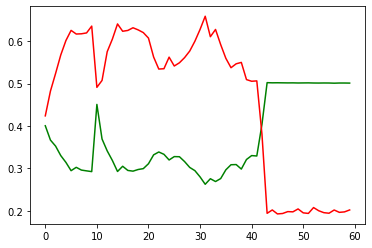

In [54]:
## graph between training loss and training accuracy 

plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['accuracy'],'r')
plt.show()

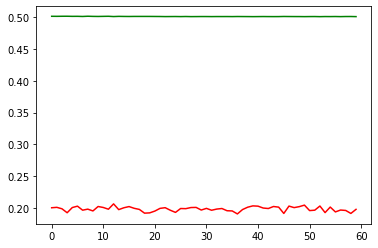

In [55]:
plt.figure(1)
plt.plot(hist2.history['loss'],'g')
plt.plot(hist2.history['accuracy'],'r')
plt.show()

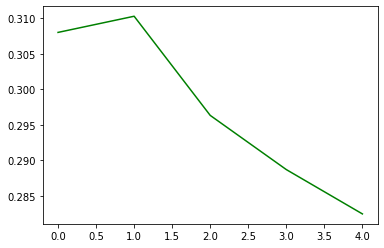

In [58]:
plt.figure(2)
plt.plot(hist3.history['loss'],'g')

plt.show()

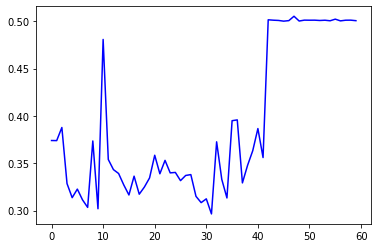

In [60]:
plt.figure(3)
plt.plot(hist.history['val_loss'],'b')
plt.show()